<a href="https://colab.research.google.com/github/maitraiyee09/image-stegano/blob/main/steganography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np

def encode_text(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def decode_text(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return n.to_bytes((n.bit_length() + 7) // 8, 'big').decode(encoding, errors) or '\0'
hidden_message = "cyber securityi000"

encoded_text = encode_text(hidden_message)
decoded_text = decode_text(encoded_text)

print("encoded:", encoded_text)
print("decoded:", decoded_text)


encoded: 011000110111100101100010011001010111001000100000011100110110010101100011011101010111001001101001011101000111100101101001001100000011000000110000
decoded: cyber securityi000


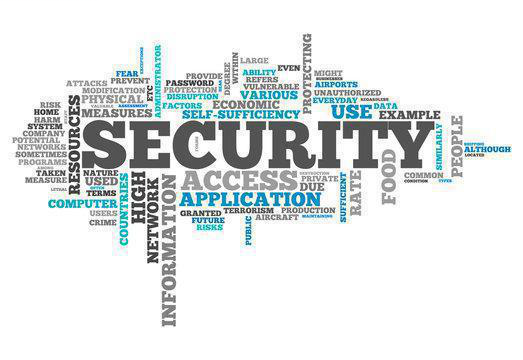

In [ ]:
def encode_in_image(filename, text_message):
    # Open the image, store the shape and convert to
    # one-dimensional list
    input_im = Image.open(filename, 'r').convert("RGB")
    image_shape = np.asarray(input_im).shape
    flat_array = np.asarray(input_im).flatten()

    # Encode the message and add prefix
    encoded_text = encode_text(text_message + "<STOP>")

# Enter message in the least significant bit where necessary
    encoded_array = [
        (0b11111110 & value) | int(encode_bit) if ix < len(encoded_text) 
        else value
        for ix, (encode_bit, value) in 
        enumerate(zip(encoded_text.ljust(len(flat_array), '0'), flat_array))]

    # Turn encoded array into image and return
    encoded_im = np.array(encoded_array).reshape(image_shape)    
    return Image.fromarray(np.uint8(encoded_im)).convert('RGB')

encoded_im = encode_in_image('a.jpg', "decrepted098754e$$$$  the image")
encoded_im.save('b.png')

encoded_im



In [ ]:
def extract_from_image(filename):
    # Open image
    encoded_im = np.asarray(Image.open(filename, 'r').convert("RGB"))

    # Extract least significant bits from fl
    # at (one-dimensional) image
    extracted_bits = [str(0b00000001 & value) for value in encoded_im.flatten()]

    # Join bits together, decode and split at <STOP>
    extracted_bits = ''.join(extracted_bits)
    return decode_text(extracted_bits, errors='replace').split('<STOP>')[0]
    
extract_from_image('b.png')


'decrepted098754e$$$$  the image'